<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Открытие-и-оценка-данных" data-toc-modified-id="Открытие-и-оценка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Открытие и оценка данных</a></span></li><li><span><a href="#Пропуски,-дубликаты" data-toc-modified-id="Пропуски,-дубликаты-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Пропуски, дубликаты</a></span></li><li><span><a href="#Статистика,-корреляция" data-toc-modified-id="Статистика,-корреляция-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Статистика, корреляция</a></span></li><li><span><a href="#Оценка-категориальных-признаков" data-toc-modified-id="Оценка-категориальных-признаков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Оценка категориальных признаков</a></span></li><li><span><a href="#Оценка-числовых-признаков" data-toc-modified-id="Оценка-числовых-признаков-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Оценка числовых признаков</a></span></li><li><span><a href="#Удаление-лишних-признаков-и-исправление-оставшихся-ошибок" data-toc-modified-id="Удаление-лишних-признаков-и-исправление-оставшихся-ошибок-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Удаление лишних признаков и исправление оставшихся ошибок</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt


## Открытие и оценка данных

In [2]:
data=pd.read_csv('df_rent.csv')
data

,author,author_type,link,city,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price_per_m2,price,district,street,underground,residential_complex,year_of_construction,living_meters,kitchen_meters,phone
0,ID 68011836,realtor,https://zvenigorod.cian.ru/sale/flat/283141854/,Звенигород,sale,flat,6,7,1,38.0,210526,7999999,NaN,NaN,Строгино,NaN,NaN,NaN,NaN,NaN
1,ID 16673486,unknown,https://zvenigorod.cian.ru/sale/flat/282494496/,Звенигород,sale,flat,8,16,2,38.0,157894,5999999,NaN,NaN,Строгино,NaN,NaN,NaN,NaN,NaN
2,ID 18318296,homeowner,https://zvenigorod.cian.ru/sale/flat/285491950/,Звенигород,sale,flat,4,14,2,56.7,133686,7580000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ОГРК,real_estate_agent,https://zvenigorod.cian.ru/sale/flat/282788048/,Звенигород,sale,flat,15,16,1,28.8,104166,3000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ДомЭль Недвижимость. Отделение на Серпуховской...,real_estate_agent,https://zvenigorod.cian.ru/sale/flat/279656102/,Звенигород,sale,flat,5,6,3,90.1,132075,11900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119408,ID 7336781,unknown,https://zhukovsky.cian.ru/sale/flat/261733548/,Жуковский,sale,flat,11,20,1,51.0,148039,7550000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119409,ID 52564949,homeowner,https://zhukovsky.cian.ru/sale/flat/279782565/,Жуковский,sale,flat,9,17,2,69.6,201149,14000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119410,ID 52146117,homeowner,https://zhukovsky.cian.ru/sale/flat/272226067/,Жуковский,sale,flat,17,17,4,171.6,163170,28000000,NaN,NaN,Котельники,NaN,NaN,NaN,NaN,NaN
119411,ID 102132457,homeowner,https://zhukovsky.cian.ru/sale/flat/286338829/,Жуковский,sale,flat,1,5,2,44.1,136054,6000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119413 entries, 0 to 119412
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   author                117386 non-null  object 
 1   author_type           117406 non-null  object 
 2   link                  119413 non-null  object 
 3   city                  119413 non-null  object 
 4   deal_type             119413 non-null  object 
 5   accommodation_type    119413 non-null  object 
 6   floor                 119413 non-null  int64  
 7   floors_count          119413 non-null  int64  
 8   rooms_count           119413 non-null  int64  
 9   total_meters          119413 non-null  float64
 10  price_per_m2          119413 non-null  int64  
 11  price                 119413 non-null  int64  
 12  district              47190 non-null   object 
 13  street                43724 non-null   object 
 14  underground           14993 non-null   object 
 15  

array([[<Axes: title={'center': 'floor'}>,
        <Axes: title={'center': 'floors_count'}>,
        <Axes: title={'center': 'rooms_count'}>],
       [<Axes: title={'center': 'total_meters'}>,
        <Axes: title={'center': 'price_per_m2'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'year_of_construction'}>,
        <Axes: title={'center': 'living_meters'}>,
        <Axes: title={'center': 'kitchen_meters'}>],
       [<Axes: title={'center': 'phone'}>, <Axes: >, <Axes: >]],
      dtype=object)

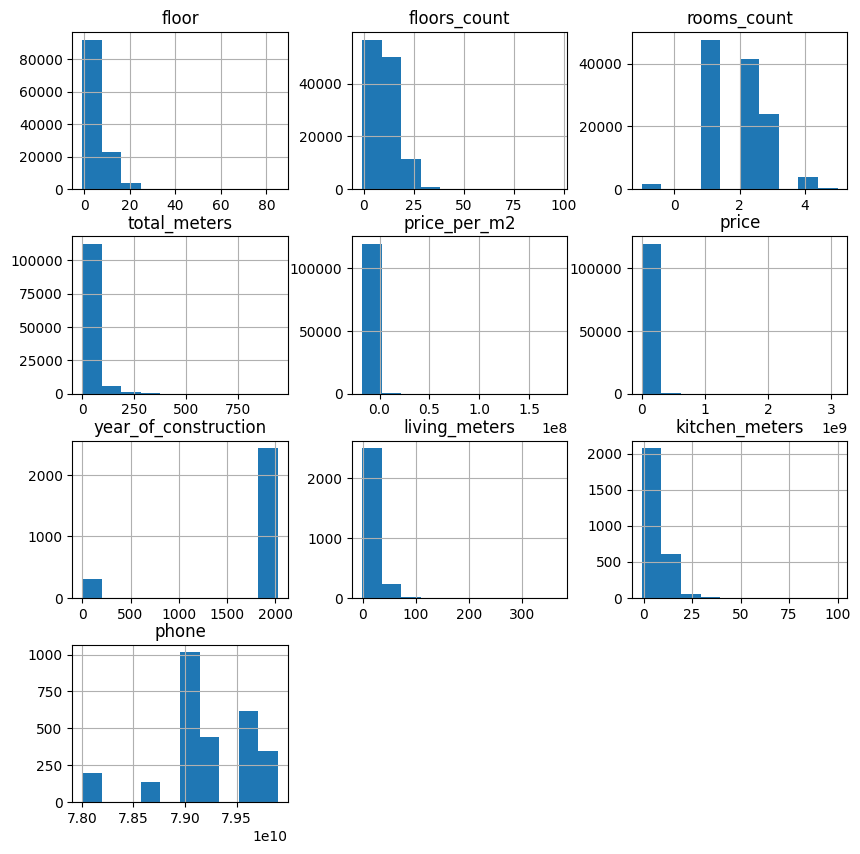

In [4]:
data.hist(figsize=(10,10))

## Пропуски, дубликаты

In [5]:
# Принудительно все категориальные признаки приведу к нижнему регистру
def lower(data):
    for col in data.columns:
        if data[col].dtype == "object":
            data[col] = data[col].str.lower()
            data[col] = data[col].astype("object")

lower(data)

In [6]:
data.head()

,author,author_type,link,city,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price_per_m2,price,district,street,underground,residential_complex,year_of_construction,living_meters,kitchen_meters,phone
0,id 68011836,realtor,https://zvenigorod.cian.ru/sale/flat/283141854/,звенигород,sale,flat,6,7,1,38.0,210526,7999999,NaN,NaN,строгино,NaN,NaN,NaN,NaN,NaN
1,id 16673486,unknown,https://zvenigorod.cian.ru/sale/flat/282494496/,звенигород,sale,flat,8,16,2,38.0,157894,5999999,NaN,NaN,строгино,NaN,NaN,NaN,NaN,NaN
2,id 18318296,homeowner,https://zvenigorod.cian.ru/sale/flat/285491950/,звенигород,sale,flat,4,14,2,56.7,133686,7580000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,огрк,real_estate_agent,https://zvenigorod.cian.ru/sale/flat/282788048/,звенигород,sale,flat,15,16,1,28.8,104166,3000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,домэль недвижимость. отделение на серпуховской...,real_estate_agent,https://zvenigorod.cian.ru/sale/flat/279656102/,звенигород,sale,flat,5,6,3,90.1,132075,11900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Проверка пропусков в процентах.
data.isna().mean()*100

author                   1.697470
author_type              1.680722
link                     0.000000
city                     0.000000
deal_type                0.000000
accommodation_type       0.000000
floor                    0.000000
floors_count             0.000000
rooms_count              0.000000
total_meters             0.000000
price_per_m2             0.000000
price                    0.000000
district                60.481690
street                  63.384221
underground             87.444416
residential_complex     82.527865
year_of_construction    97.696231
living_meters           97.696231
kitchen_meters          97.696231
phone                   97.696231
dtype: float64

In [8]:
# заполнение пропусков в район на основании метро
grouped_data = data.groupby('underground')

for name, group in grouped_data:
    if not group['district'].isnull().all():
   
        most_common_value = group['district'].mode().iloc[0]
  
        data.loc[(data['underground'] == name) & (data['district'].isnull()), 'district'] = most_common_value

In [9]:
# заполнение пропусков в район на основании улицы
grouped_data = data.groupby('street')

for name, group in grouped_data:
    if not group['district'].isnull().all():
   
        most_common_value = group['district'].mode().iloc[0]
  
        data.loc[(data['street'] == name) & (data['district'].isnull()), 'district'] = most_common_value


In [10]:
grouped_data = data.groupby('district')

# заполнение пропусков в колонке "метро" на основе наиболее часто встречающихся значений для каждого района
for name, group in grouped_data:
    if not group['underground'].isnull().all():
    # посчитать наиболее часто встречающиеся значения в колонке "метро"
        most_common_value = group['underground'].mode().iloc[0]
    # заполнить пропуски в колонке "метро" для текущего района
        data.loc[(data['district'] == name) & (data['underground'].isnull()), 'underground'] = most_common_value

In [11]:
data.isna().mean()*100

author                   1.697470
author_type              1.680722
link                     0.000000
city                     0.000000
deal_type                0.000000
accommodation_type       0.000000
floor                    0.000000
floors_count             0.000000
rooms_count              0.000000
total_meters             0.000000
price_per_m2             0.000000
price                    0.000000
district                56.356511
street                  63.384221
underground             64.404211
residential_complex     82.527865
year_of_construction    97.696231
living_meters           97.696231
kitchen_meters          97.696231
phone                   97.696231
dtype: float64

In [12]:
# удаление пропусков. Заполняем 0 или заглушкой, поскольку на эти данные надо показать пользователю
# с указанием ссылки на объявление, а при заполнении какими-то значениями, мы введём подьзователя в заблуждение.

def omissions(data):
    for col in data.columns:
        if data[col].dtype == "object":
            data[col] = data[col].fillna('не указано')
            data[col] = data[col].astype("object")
        if data[col].dtype == "float":
            data[col] = data[col].fillna(data[col].mean())

In [13]:
omissions(data)
data.isna().sum()

author                  0
author_type             0
link                    0
city                    0
deal_type               0
accommodation_type      0
floor                   0
floors_count            0
rooms_count             0
total_meters            0
price_per_m2            0
price                   0
district                0
street                  0
underground             0
residential_complex     0
year_of_construction    0
living_meters           0
kitchen_meters          0
phone                   0
dtype: int64

In [14]:
#Замена -1 на 0, так как пропуски при парсере автоматически заполняются -1
for col in data.columns:
    data[col]=data[col].replace(to_replace=-1, value=0,regex=True)


In [15]:
# Проверка дубликатов
data.duplicated().sum()

4380

In [16]:
#Удаление дубликатов
data=data.drop_duplicates()
data.duplicated().sum()

0

## Статистика, корреляция

In [17]:
# Оценка статистики
data.describe()

,floor,floors_count,rooms_count,total_meters,price_per_m2,price,year_of_construction,living_meters,kitchen_meters,phone
count,115033.000000,115033.000000,115033.000000,115033.000000,1.150330e+05,1.150330e+05,115033.000000,115033.000000,115033.000000,1.150330e+05
mean,5.246399,9.682422,1.854537,53.316119,1.187831e+05,6.644397e+06,1779.027422,14.499546,6.505883,7.924590e+10
std,4.788183,6.872652,0.897645,29.168924,7.374081e+05,2.005326e+07,98.275296,2.560064,0.946541,6.876690e+07
min,0.000000,0.000000,0.000000,0.000000,-1.751134e+07,2.500000e+04,0.000000,0.000000,0.000000,7.800333e+10
25%,2.000000,5.000000,1.000000,36.450000,6.870900e+04,2.900000e+06,1779.024718,14.490731,6.500545,7.924590e+10
50%,4.000000,9.000000,2.000000,46.400000,9.251100e+04,4.350000e+06,1779.024718,14.490731,6.500545,7.924590e+10
75%,7.000000,14.000000,2.000000,62.100000,1.287120e+05,6.650000e+06,1779.024718,14.490731,6.500545,7.924590e+10
max,85.000000,97.000000,5.000000,941.700000,1.782178e+08,3.100000e+09,2026.000000,367.000000,100.000000,7.989856e+10


In [18]:
#Убираю знак минус в цене, который скорее всего при запонении был тире
data['price_per_m2']=data['price_per_m2'].abs()

C:\Users\AcerUser\AppData\Local\Temp\ipykernel_12348\4139358979.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price_per_m2']=data['price_per_m2'].abs()


In [19]:
# Корреляция числовых признаков
data.corr()

C:\Users\AcerUser\AppData\Local\Temp\ipykernel_12348\3730515234.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,floor,floors_count,rooms_count,total_meters,price_per_m2,price,year_of_construction,living_meters,kitchen_meters,phone
floor,1.000000,0.674366,-0.023957,0.085115,0.028315,0.112871,0.006307,0.002499,0.008435,0.001154
floors_count,0.674366,1.000000,-0.047027,0.084399,0.040292,0.131518,0.008232,-0.006611,0.001394,-0.002668
rooms_count,-0.023957,-0.047027,1.000000,0.542868,-0.015998,0.124129,0.011038,0.044083,0.025651,-0.022068
total_meters,0.085115,0.084399,0.542868,1.000000,0.009185,0.391213,0.009584,0.073613,0.064984,-0.028381
price_per_m2,0.028315,0.040292,-0.015998,0.009185,1.000000,0.291834,-0.000043,-0.000376,0.000075,-0.000411
price,0.112871,0.131518,0.124129,0.391213,0.291834,1.000000,0.001158,0.015499,0.014635,-0.003187
year_of_construction,0.006307,0.008232,0.011038,0.009584,-0.000043,0.001158,1.000000,0.170842,0.173547,-0.109758
living_meters,0.002499,-0.006611,0.044083,0.073613,-0.000376,0.015499,0.170842,1.000000,0.527042,0.017035
kitchen_meters,0.008435,0.001394,0.025651,0.064984,0.000075,0.014635,0.173547,0.527042,1.000000,0.001577
phone,0.001154,-0.002668,-0.022068,-0.028381,-0.000411,-0.003187,-0.109758,0.017035,0.001577,1.000000


## Оценка категориальных признаков

In [20]:
#Посмотрю уникальные значения городов, районом, улиц и т.д.
data['city'].unique()

array(['звенигород', 'абакан', 'анапа', 'архангельск', 'астрахань',
       'барнаул', 'белгород', 'биробиджан', 'благовещенск', 'брянск',
       'бронницы', 'чебоксары', 'челябинск', 'череповец', 'черкесск',
       'дмитров', 'долгопрудный', 'дубна', 'дзержинский', 'екатеринбург',
       'электросталь', 'элиста', 'фрязино', 'геленджик', 'горно-алтайск',
       'грозный', 'хабаровск', 'ханты-мансийск', 'химки', 'иркутск',
       'иванов', 'ижевск', 'якутск', 'ярославль', 'йошкар-ола',
       'южно-сахалинск', 'калининград', 'калуга', 'казань', 'кострома',
       'краснодар', 'красноярск', 'краснознаменск', 'курган', 'курск',
       'кызыл', 'липецк', 'лобня', 'лыткарино', 'магадан', 'махачкала',
       'майкоп', 'москва', 'мурманск', 'нальчик', 'назрань', 'новгород',
       'новороссийск', 'новосибирск', 'омск', 'орехово-зуево', 'орёл',
       'оренбург', 'пенза', 'пермь', 'петропавловск-камчатский',
       'петрозаводск', 'подольск', 'псков', 'реутов', 'рязань', 'рошаль',
       'росто

In [21]:
# Оставляю только Москву
data1=data.query('city=="москва"')
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2657 entries, 56939 to 59693
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   author                2657 non-null   object 
 1   author_type           2657 non-null   object 
 2   link                  2657 non-null   object 
 3   city                  2657 non-null   object 
 4   deal_type             2657 non-null   object 
 5   accommodation_type    2657 non-null   object 
 6   floor                 2657 non-null   int64  
 7   floors_count          2657 non-null   int64  
 8   rooms_count           2657 non-null   int64  
 9   total_meters          2657 non-null   float64
 10  price_per_m2          2657 non-null   int64  
 11  price                 2657 non-null   int64  
 12  district              2657 non-null   object 
 13  street                2657 non-null   object 
 14  underground           2657 non-null   object 
 15  residential_comp

In [22]:
data1.describe()

,floor,floors_count,rooms_count,total_meters,price_per_m2,price,year_of_construction,living_meters,kitchen_meters,phone
count,2657.000000,2657.000000,2657.000000,2657.000000,2.657000e+03,2.657000e+03,2.657000e+03,2.657000e+03,2.657000e+03,2.657000e+03
mean,10.099737,20.110275,2.147911,88.077407,7.241398e+05,5.578439e+07,1.779025e+03,1.449073e+01,6.500545e+00,7.924590e+10
std,11.240467,16.471003,1.091256,64.913191,2.963765e+06,9.578981e+07,1.091599e-11,3.855420e-13,6.129585e-14,3.174426e-03
min,0.000000,0.000000,0.000000,0.000000,2.080200e+04,3.400000e+06,1.779025e+03,1.449073e+01,6.500545e+00,7.924590e+10
25%,3.000000,9.000000,2.000000,47.300000,2.743680e+05,1.310000e+07,1.779025e+03,1.449073e+01,6.500545e+00,7.924590e+10
50%,6.000000,17.000000,2.000000,66.000000,4.220770e+05,2.650000e+07,1.779025e+03,1.449073e+01,6.500545e+00,7.924590e+10
75%,13.000000,25.000000,3.000000,107.900000,6.221540e+05,6.000000e+07,1.779025e+03,1.449073e+01,6.500545e+00,7.924590e+10
max,85.000000,97.000000,5.000000,941.700000,1.014792e+08,2.455020e+09,1.779025e+03,1.449073e+01,6.500545e+00,7.924590e+10


In [23]:
# Проверка содержимого столбца с типом сделки
data1['deal_type'].unique()

array(['sale'], dtype=object)

In [24]:
#Столбец содержит только одно знаение - продажа. Можно удалить
data1=data1.drop('deal_type',axis=1)

In [25]:
#Проверка типа недвижимости
data1['accommodation_type'].unique()

array(['flat'], dtype=object)

In [26]:
#Столбец содержит только одно значение. Можно удалить
data1=data1.drop('accommodation_type',axis=1)

In [27]:
data1['district'].sort_values().unique()

array(['академический', 'алексеевский', 'алтуфьевский', 'арбат',
       'аэропорт', 'бабушкинский', 'басманный', 'беговой',
       'бескудниковский', 'бибирево', 'бирюлево восточное',
       'бирюлево западное', 'богородское', 'братеево', 'бутырский',
       'вешняки', 'внуково', 'войковский', 'восточное дегунино',
       'восточное измайлово', 'выхино-жулебино', 'гагаринский',
       'головинский', 'гольяново', 'даниловский', 'дмитровский',
       'донской', 'дорогомилово', 'замоскворечье', 'западное дегунино',
       'зюзино', 'зябликово', 'ивановское', 'измайлово', 'коньково',
       'коптево', 'косино-ухтомский', 'котловка', 'красносельский',
       'крылатское', 'крюково', 'кузьминки', 'кунцево', 'левобережный',
       'лефортово', 'ломоносовский', 'лосиноостровский',
       'лучшая кв-ра в е!свежий ремонт3-комн. кв.', 'люблино', 'марфино',
       'марьина роща', 'марьино', 'метрогородок', 'мещанский', 'митино',
       'можайский', 'молжаниновский', 'москворечье-сабурово',
       

In [28]:
# Так как вместо названия района попадаются объясления и ненужный текст, создаём правило, которое оставит только тест, содержадий не более 3х слов
def remove_long_text(text):
    words = text.split()
    if len(words) > 3:
        return None
    else:
        return text

# Применяем функцию remove_long_text() к колонке "district" и сохраняем результат в новую колонку "clean_district"
data1['clean_district'] = data1['district'].apply(remove_long_text)

# Удаляем все строки с пустыми значениями в колонке "clean_text"
data1.dropna(subset=['clean_district'], inplace=True)

# Удаляем колонку "district"
data1.drop('district', axis=1, inplace=True)


In [29]:
#Возвращаем прежнее название колонки
data1= data1.rename(columns={'clean_district': 'district'})

In [30]:
data1['district'].sort_values().unique()

array(['академический', 'алексеевский', 'алтуфьевский', 'арбат',
       'аэропорт', 'бабушкинский', 'басманный', 'беговой',
       'бескудниковский', 'бибирево', 'бирюлево восточное',
       'бирюлево западное', 'богородское', 'братеево', 'бутырский',
       'вешняки', 'внуково', 'войковский', 'восточное дегунино',
       'восточное измайлово', 'выхино-жулебино', 'гагаринский',
       'головинский', 'гольяново', 'даниловский', 'дмитровский',
       'донской', 'дорогомилово', 'замоскворечье', 'западное дегунино',
       'зюзино', 'зябликово', 'ивановское', 'измайлово', 'коньково',
       'коптево', 'косино-ухтомский', 'котловка', 'красносельский',
       'крылатское', 'крюково', 'кузьминки', 'кунцево', 'левобережный',
       'лефортово', 'ломоносовский', 'лосиноостровский', 'люблино',
       'марфино', 'марьина роща', 'марьино', 'метрогородок', 'мещанский',
       'митино', 'можайский', 'молжаниновский', 'москворечье-сабурово',
       'нагатино-садовники', 'нагатинский затон', 'нагорный

In [31]:
# Колонки с названием застройщика удаляем. В данном случае - это лишняя информация (есть название метро и района)
# Также удаляем название автора, оставляя тип автора
data1=data1.drop(['street', 'author'], axis=1)
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2655 entries, 56939 to 59693
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   author_type           2655 non-null   object 
 1   link                  2655 non-null   object 
 2   city                  2655 non-null   object 
 3   floor                 2655 non-null   int64  
 4   floors_count          2655 non-null   int64  
 5   rooms_count           2655 non-null   int64  
 6   total_meters          2655 non-null   float64
 7   price_per_m2          2655 non-null   int64  
 8   price                 2655 non-null   int64  
 9   underground           2655 non-null   object 
 10  residential_complex   2655 non-null   object 
 11  year_of_construction  2655 non-null   float64
 12  living_meters         2655 non-null   float64
 13  kitchen_meters        2655 non-null   float64
 14  phone                 2655 non-null   float64
 15  district        

## Оценка числовых признаков

In [32]:
#Так как значения года имеет нетипичные данные, проверю содержание признака
data1['year_of_construction'].unique()

array([1779.02471828])

In [33]:
#По данным Москвы год постройки в объявлениях не указан.Столбец удалю
data1=data1.drop('year_of_construction', axis=1)

array([[<Axes: title={'center': 'floor'}>,
        <Axes: title={'center': 'floors_count'}>,
        <Axes: title={'center': 'rooms_count'}>],
       [<Axes: title={'center': 'total_meters'}>,
        <Axes: title={'center': 'price_per_m2'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'living_meters'}>,
        <Axes: title={'center': 'kitchen_meters'}>, <Axes: >]],
      dtype=object)

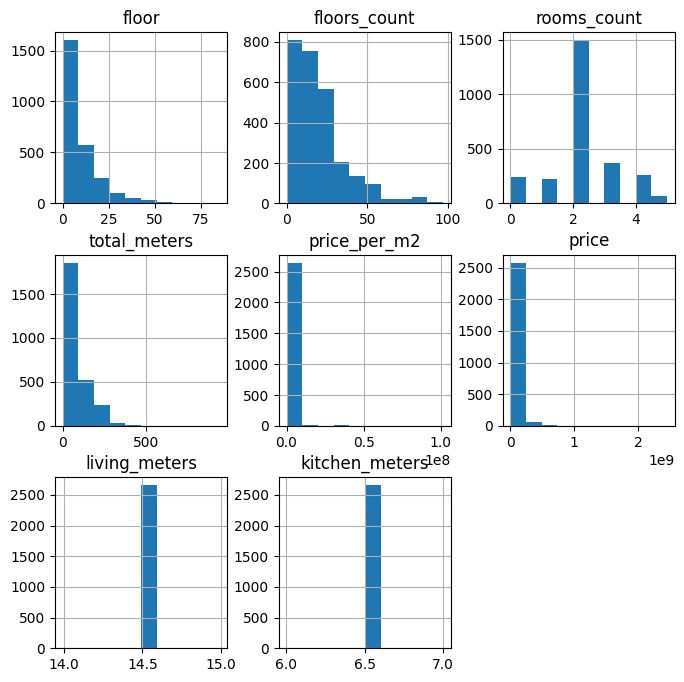

In [34]:
#Новая визуализация без номера телефона
data1.drop('phone', axis=1).hist(figsize=(8,8))

In [35]:
data1['floor'].describe()

count    2655.000000
mean       10.105085
std        11.243011
min         0.000000
25%         3.000000
50%         6.000000
75%        13.000000
max        85.000000
Name: floor, dtype: float64

<Axes: >

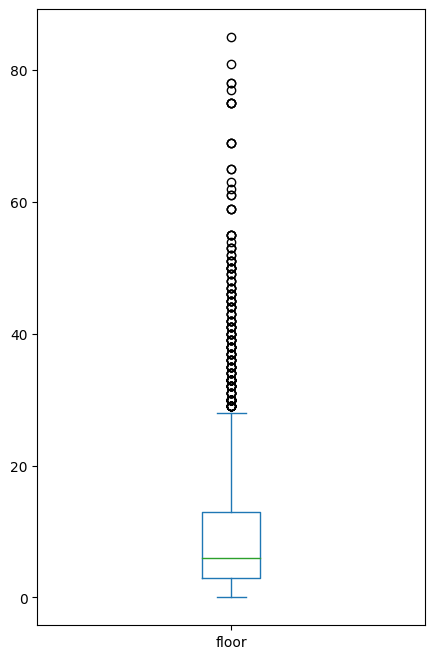

In [36]:
data1.floor.plot(kind='box', figsize=(5,8))

In [37]:
data1['floors_count'].describe()

count    2655.000000
mean       20.120151
std        16.473068
min         0.000000
25%         9.000000
50%        17.000000
75%        25.000000
max        97.000000
Name: floors_count, dtype: float64

<Axes: >

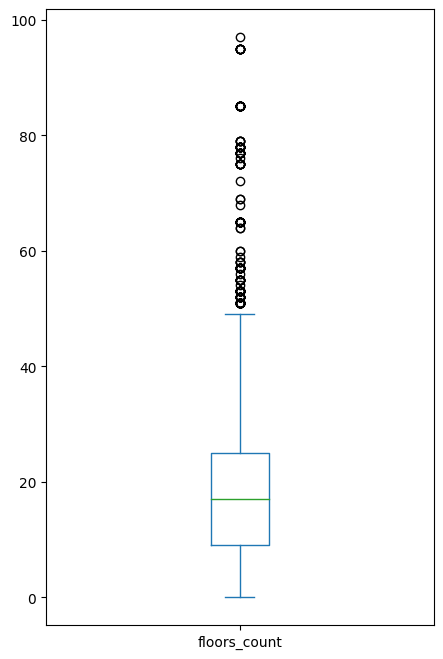

In [38]:
data1.floors_count.plot(kind='box', figsize=(5,8))

In [39]:
data1['rooms_count'].describe()

count    2655.000000
mean        2.147646
std         1.091538
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: rooms_count, dtype: float64

In [40]:
data1=data1.query('rooms_count>0')

<Axes: >

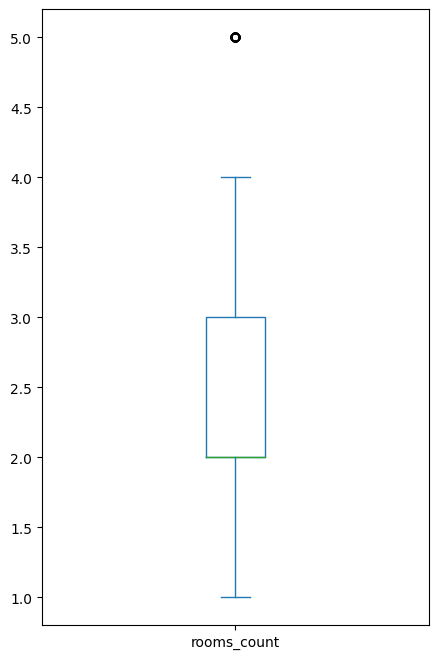

In [41]:
data1.rooms_count.plot(kind='box', figsize=(5,8))

In [42]:
data1['total_meters'].describe()

count    2416.00000
mean       80.84255
std        51.05045
min         0.60000
25%        47.60000
50%        64.90000
75%        97.15000
max       473.80000
Name: total_meters, dtype: float64

<Axes: >

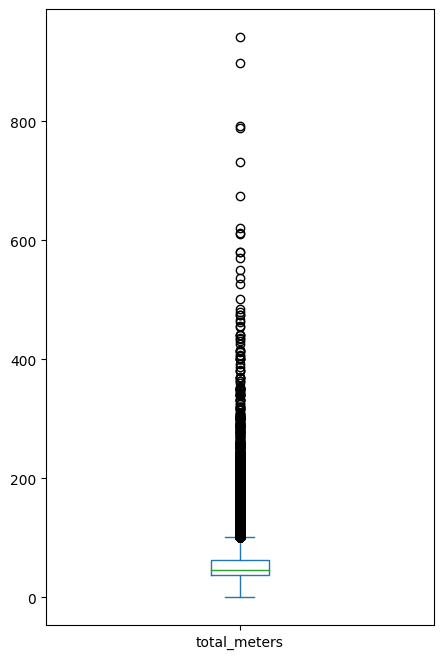

In [43]:
data.total_meters.plot(kind='box', figsize=(5,8))

In [44]:
# Ограничу площадь 9 кв. и 80% квартилем
q90=data1['total_meters'].quantile(0.9)
data1 = data1.query('total_meters >9 and total_meters <= @q90')

<Axes: >

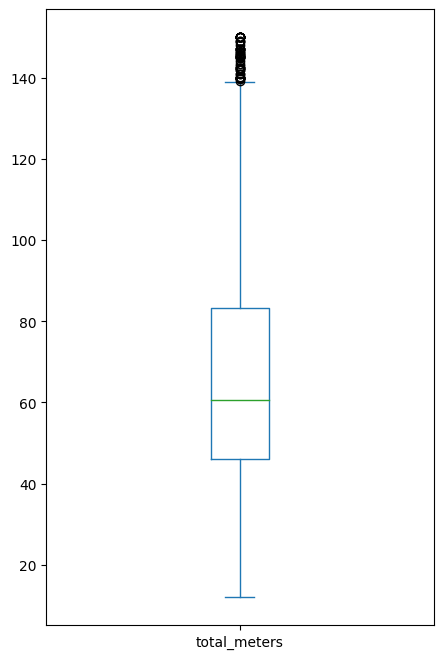

In [45]:
data1.total_meters.plot(kind='box', figsize=(5,8))

In [46]:
data1['price_per_m2'].describe()

count    2.175000e+03
mean     4.831863e+05
std      3.086891e+05
min      1.250000e+05
25%      2.730160e+05
50%      4.046150e+05
75%      5.791110e+05
max      2.708333e+06
Name: price_per_m2, dtype: float64

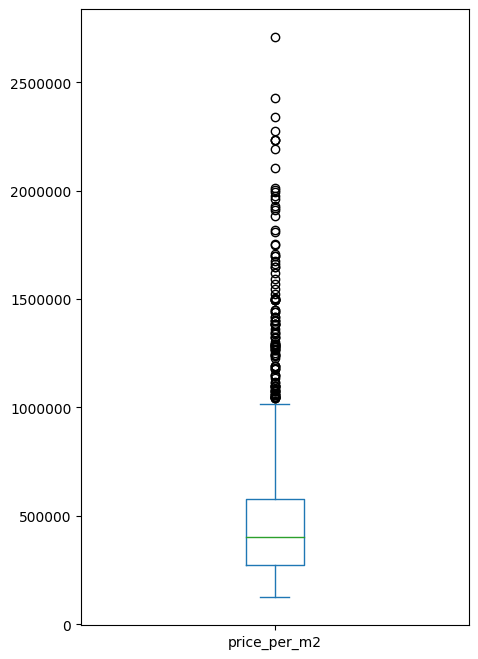

In [47]:
ax=data1.price_per_m2.plot(kind='box', figsize=(5,8))
ax.ticklabel_format(useOffset=False, style='plain', axis='y')

In [48]:
#определение 10% и 90% квартилей, чтобы всё, что выходит за рамки убрать

q10 = data1['price_per_m2'].quantile(0.1)
q80 = data1['price_per_m2'].quantile(0.8)


In [49]:
data1 = data1.query('price_per_m2 >= @q10 and price_per_m2 <= @q80')

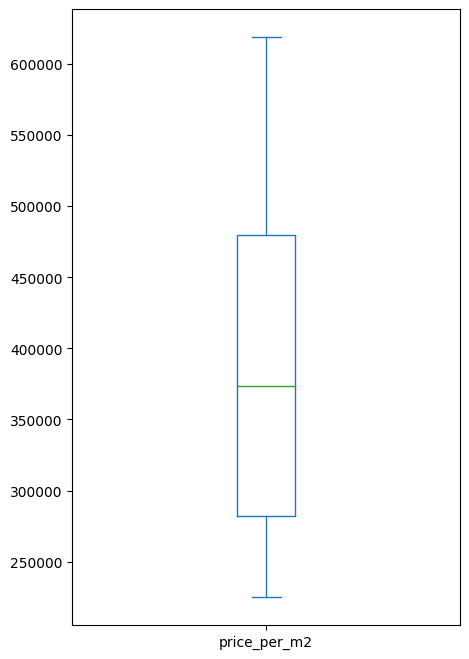

In [50]:
ax=data1.price_per_m2.plot(kind='box', figsize=(5,8))
ax.ticklabel_format(useOffset=False, style='plain', axis='y')

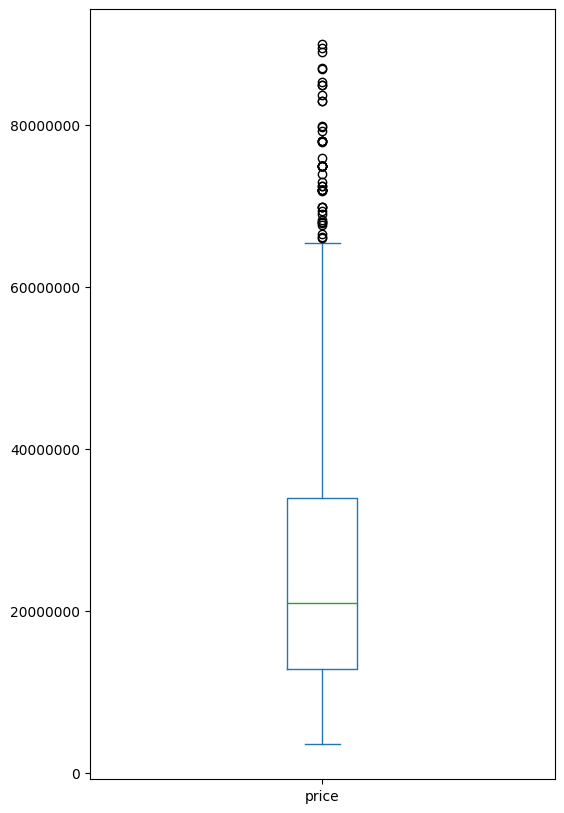

In [51]:
ax=data1.price.plot(kind='box', figsize=(6,10))
ax.ticklabel_format(useOffset=False, style='plain', axis='y')

In [52]:
# убираю цены, которые встречаются крайне редко
data1=data1.query('1000000<price<100000000')

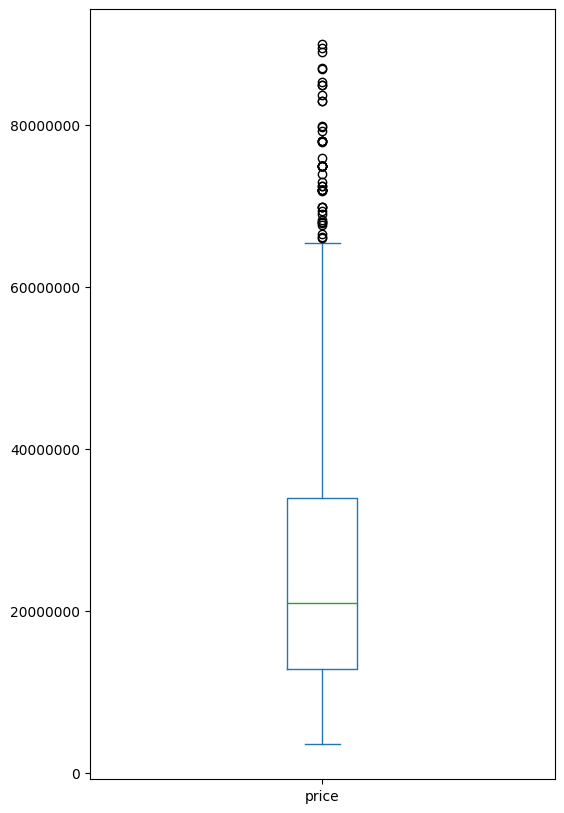

In [53]:
ax=data1.price.plot(kind='box', figsize=(6,10))
ax.ticklabel_format(useOffset=False, style='plain', axis='y')

In [54]:
data['living_meters'].describe()

count    115033.000000
mean         14.499546
std           2.560064
min           0.000000
25%          14.490731
50%          14.490731
75%          14.490731
max         367.000000
Name: living_meters, dtype: float64

In [55]:
data['kitchen_meters'].describe()

count    115033.000000
mean          6.505883
std           0.946541
min           0.000000
25%           6.500545
50%           6.500545
75%           6.500545
max         100.000000
Name: kitchen_meters, dtype: float64

array([[<Axes: title={'center': 'floor'}>,
        <Axes: title={'center': 'floors_count'}>,
        <Axes: title={'center': 'rooms_count'}>],
       [<Axes: title={'center': 'total_meters'}>,
        <Axes: title={'center': 'price_per_m2'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'living_meters'}>,
        <Axes: title={'center': 'kitchen_meters'}>, <Axes: >]],
      dtype=object)

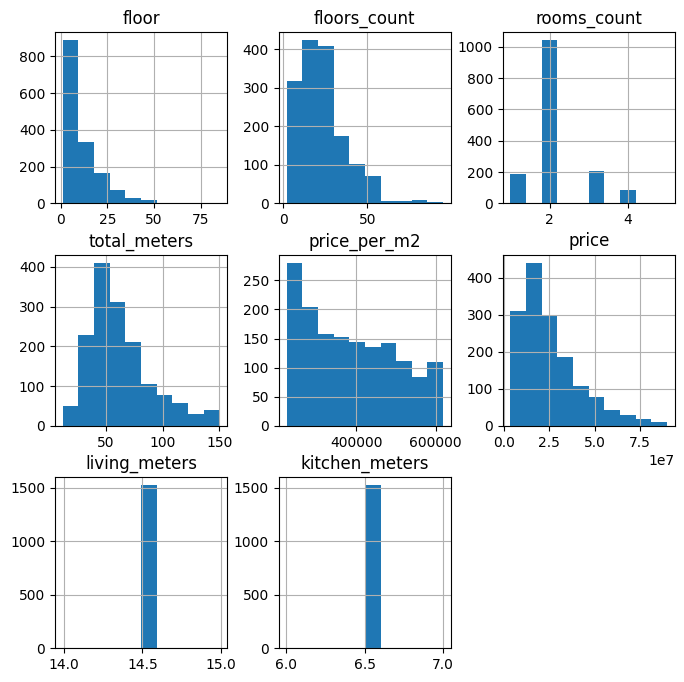

In [56]:
data1.drop('phone',axis=1).hist(figsize=(8,8))

## Удаление лишних признаков и исправление оставшихся ошибок

In [57]:
#Для обучения модели оставляем датасет без ссылок, номера телефона, жилой площади и площади кухни (данных по ним практически нет)
data_model=data1.drop(['link', 'living_meters', 'kitchen_meters', 'phone'], axis=1)
data_model.to_csv('data_model.csv',index=False)

In [58]:
#Сохраняем таблицу с ссылками
data1=data1.drop(['living_meters', 'kitchen_meters', 'phone'], axis=1)
data1.to_csv('data_fin.csv',index=False)

In [59]:
data1.head()

,author_type,link,city,floor,floors_count,rooms_count,total_meters,price_per_m2,price,underground,residential_complex,district
56939,developer,https://www.cian.ru/sale/flat/277738124/,москва,5,21,2,77.85,437636,34069999,белорусская,глоракс премиум белорусская,беговой
56945,developer,https://www.cian.ru/sale/flat/285606684/,москва,2,21,2,61.00,447278,27284000,ботанический сад,союз,ростокино
56946,developer,https://www.cian.ru/sale/flat/284037220/,москва,8,17,2,62.00,372602,23101349,зил,шагал жк,даниловский
56948,developer,https://www.cian.ru/sale/flat/281257851/,москва,4,41,2,60.30,587442,35422783,лужники,hide,раменки
56950,developer,https://www.cian.ru/sale/flat/280707242/,москва,13,45,2,73.40,509750,37415683,фили,river park towers кутузовский,дорогомилово


In [60]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1522 entries, 56939 to 59693
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   author_type          1522 non-null   object 
 1   link                 1522 non-null   object 
 2   city                 1522 non-null   object 
 3   floor                1522 non-null   int64  
 4   floors_count         1522 non-null   int64  
 5   rooms_count          1522 non-null   int64  
 6   total_meters         1522 non-null   float64
 7   price_per_m2         1522 non-null   int64  
 8   price                1522 non-null   int64  
 9   underground          1522 non-null   object 
 10  residential_complex  1522 non-null   object 
 11  district             1522 non-null   object 
dtypes: float64(1), int64(5), object(6)
memory usage: 154.6+ KB
